In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv('data.txt')

In [4]:
train_data.head()

,Age,Sex,Chest_Pain_Type,trestbps,cholestrol,fasting_blood_sugar,restecg,maximum_heart_rate,Exercise,oldpeak,slope,ca,thal,heart_disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
train_data.shape

(303, 14)

In [6]:
train_data.isnull().sum()

Age                    0
Sex                    0
Chest_Pain_Type        0
trestbps               0
cholestrol             0
fasting_blood_sugar    0
restecg                0
maximum_heart_rate     0
Exercise               0
oldpeak                0
slope                  0
ca                     0
thal                   0
heart_disease          0
dtype: int64

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  303 non-null    float64
 1   Sex                  303 non-null    float64
 2   Chest_Pain_Type      303 non-null    float64
 3   trestbps             303 non-null    float64
 4   cholestrol           303 non-null    float64
 5   fasting_blood_sugar  303 non-null    float64
 6   restecg              303 non-null    float64
 7   maximum_heart_rate   303 non-null    float64
 8   Exercise             303 non-null    float64
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    float64
 11  ca                   303 non-null    float64
 12  thal                 303 non-null    float64
 13  heart_disease        303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [8]:
corr_mat = train_data.corr()

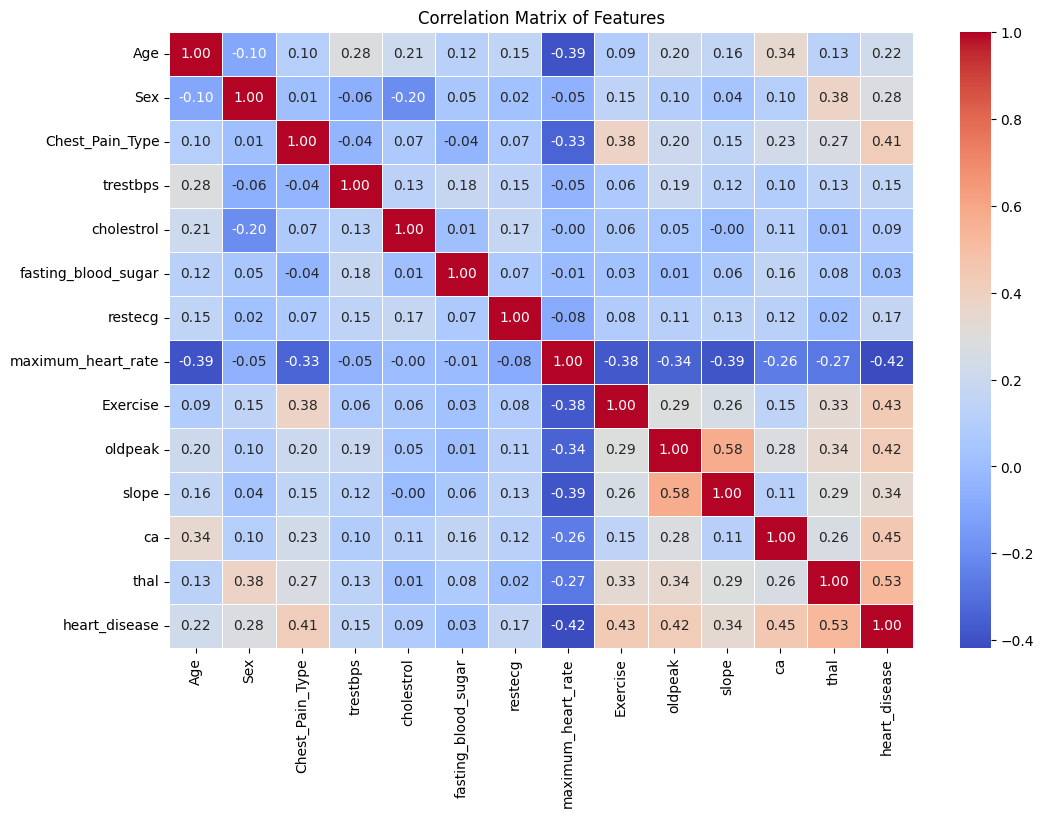

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [10]:
selected_features = [
    'thal',
    'ca',
    'Exercise',
    'Chest_Pain_Type',
    'oldpeak',
    'maximum_heart_rate',
    'slope',
    'Sex',
    'Age'  
]


In [11]:
X = train_data[selected_features]
Y = train_data['heart_disease']

In [12]:
X = X.to_numpy()
Y = Y.to_numpy()

In [13]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [16]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
mean = np.mean(X_train,axis=0)
std = np.std(X_train,axis=0)

In [17]:
std

array([ 1.92432475,  0.90044726,  0.4733164 ,  0.9875255 ,  1.18540431,
       22.42449405,  0.61762692,  0.47470329,  9.09133451])

In [18]:
std[std==0]

array([], dtype=float64)

In [19]:
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [20]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [22]:
def loss_value(y,y_p):
    eps = 1e-9
    return -np.mean(y*np.log(y_p+eps)+(1-y)*(np.log(1-y_p+eps)))

In [25]:
def training(X, Y, lr=0.001, epochs=100000):
    num_rows, num_cols = X.shape
    weights = np.zeros(num_cols)
    bias = 0
    losses = []
    best_weights = None
    best_bias = None
    min_loss = float('inf')
    for epoch in range(epochs):
        linear_eq = np.dot(X, weights) + bias
        y_p = sigmoid(linear_eq)
        y_p = np.clip(y_p, 1e-9, 1 - 1e-9)  
        dw = (1 / num_rows) * np.dot(X.T, (y_p - Y))
        db = (1 / num_rows) * np.sum(y_p - Y)
        weights -= lr * dw
        bias -= lr * db
        loss = loss_value(Y, y_p)
        if loss < min_loss:
            min_loss = loss
            best_weights = weights.copy()
            best_bias = bias
            
        if epoch % 10 == 0:
            losses.append(loss)

    min_loss_index = losses.index(min(losses))
    min_loss_epoch = min_loss_index * 10  

    plt.figure(figsize=(12, 8))
    plt.plot(range(0, epochs, 10), losses, color='blue', linewidth=2, label='Loss')
    plt.axvline(x=min_loss_epoch, color='red', linestyle='--', label=f'Min Loss at Epoch {min_loss_epoch}')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Epochs vs Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return best_weights, best_bias, min_loss_index

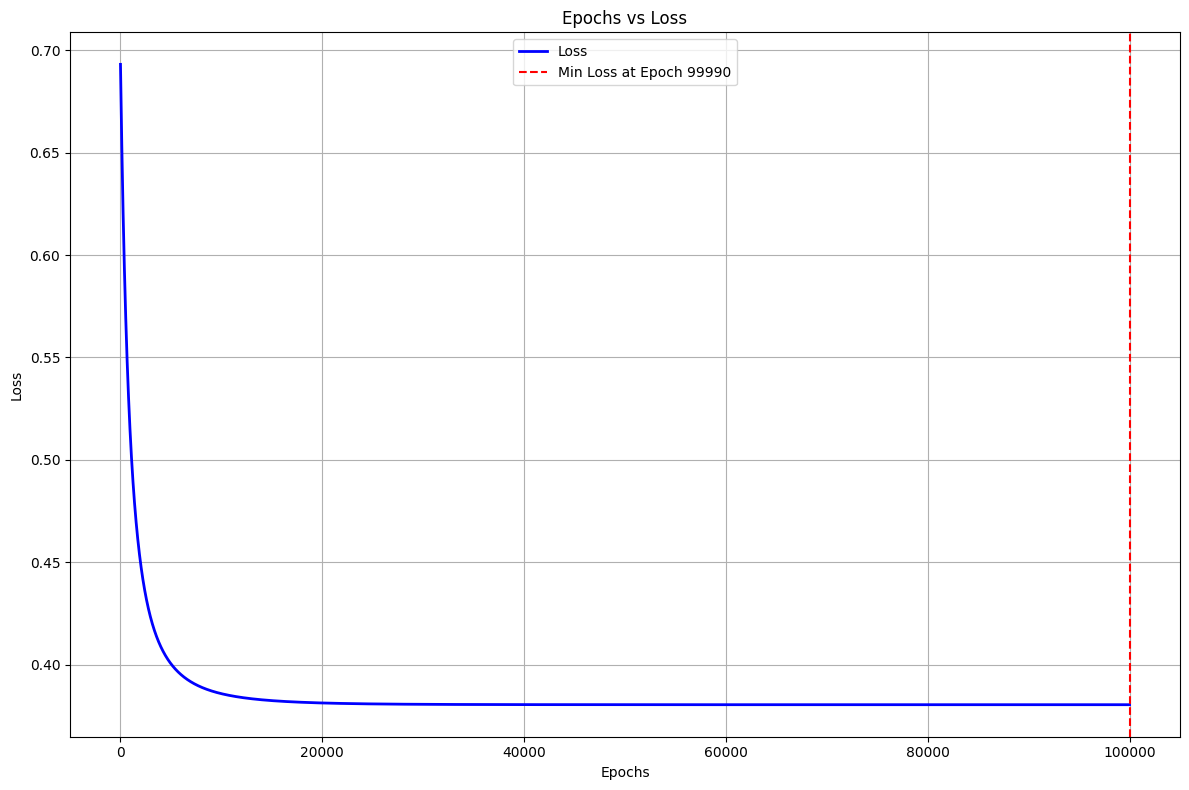

In [30]:
best_weight,best_bias,min_loss = training(X_train,Y_train,lr=0.001,epochs=100000)

In [31]:
best_weight

array([ 0.55587059,  0.96016332,  0.4229562 ,  0.50854425,  0.47902127,
       -0.19227237,  0.32428364,  0.51803253,  0.22175316])

In [32]:
best_bias

-0.24819357846382942

In [33]:
min_loss

9999

In [34]:
predicted_values = sigmoid(np.dot(X_test,best_weight)+best_bias)

In [38]:
Y_predicted_labels = (predicted_values>=0.5).astype(int)

In [41]:
np.mean(Y_predicted_labels == Y_test)*100

88.52459016393442

In [42]:
from sklearn.linear_model import LogisticRegression

In [45]:
model = LogisticRegression()

In [52]:
model.fit(X_train,Y_train)

LogisticRegression()

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(model.predict(X_test),Y_test)

0.8852459016393442

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
print(classification_report(model.predict(X_test),Y_test))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.88      0.90      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.89        61
weighted avg       0.89      0.89      0.89        61



In [58]:
print(confusion_matrix(model.predict(X_test),Y_test))

[[26  4]
 [ 3 28]]


In [59]:
import pickle

In [76]:
pickle.dump(model,open('LR.pkl','wb'))

In [78]:
pickled_model = pickle.load(open('LR.pkl','rb'))